In [1]:
import numpy as np
from pathlib import Path
from llm_robustness.utils.data import json_to_dataframe


def attack_success_rate(vanilla_correct, adversarial_correct):
    assert len(vanilla_correct) == len(
        adversarial_correct
    ), "The lengths of the lists are not equal"
    return sum(va == aa for va, aa in zip(vanilla_correct, adversarial_correct)) / len(
        vanilla_correct
    )


IN_FILE = Path(
    "../../../data/results/rest_questions_adversarial_mixtral_mixtral_gpt4o_judge.json"
)
df_mixtral = json_to_dataframe(IN_FILE)
df_mixtral = df_mixtral.rename(columns={"predicted_correct": "rag_correct"})
assert (
    df_mixtral["id"].duplicated().sum() == 0
), "There are duplicated ids in the dataframe"

IN_FILE = Path(
    "../../../data/results/rest_questions_adversarial_mixtral_gemma9b_gpt4o_judge.json"
)
df_gemma = json_to_dataframe(IN_FILE)
IN_FILE = Path(
    "../../../data/results/rest_questions_adversarial_mixtral_llama70b_gpt4o_judge.json"
)
df_llama = json_to_dataframe(IN_FILE)
IN_FILE = Path(
    "../../../data/results/rest_questions_adversarial_mixtral_gpt4o_gpt4o_judge.json"
)
df_gpt4o = json_to_dataframe(IN_FILE)

vanilla_acc = df_mixtral["vanilla_correct"].value_counts()["yes"] / len(df_mixtral)
rag_acc = df_mixtral["rag_correct"].value_counts()["yes"] / len(df_mixtral)
adversarial_gemma_acc = df_gemma["adversarial_correct"].value_counts()["yes"] / len(
    df_gemma
)
adversarial_mixtral_acc = df_mixtral["adversarial_correct"].value_counts()["yes"] / len(
    df_mixtral
)
adversarial_llama_acc = df_llama["adversarial_correct"].value_counts()["yes"] / len(
    df_llama
)
adversarial_gpt_acc = df_gpt4o["adversarial_correct"].value_counts()["yes"] / len(
    df_gpt4o
)

asr_gemma = attack_success_rate(
    df_mixtral.vanilla_correct, df_gemma.adversarial_correct
)
asr_mixtral = attack_success_rate(
    df_mixtral.vanilla_correct, df_mixtral.adversarial_correct
)
asr_llama = attack_success_rate(
    df_mixtral.vanilla_correct, df_llama.adversarial_correct
)
asr_gpt4o = attack_success_rate(
    df_mixtral.vanilla_correct, df_gpt4o.adversarial_correct
)

assert (
    set(df_mixtral.vanilla_correct)
    == set(df_mixtral.rag_correct)
    == set(df_llama.adversarial_correct)
    == set(df_gemma.adversarial_correct)
    == set(df_mixtral.adversarial_correct)
    == set(df_gpt4o.adversarial_correct)
), "The answers are not the same across all dataframes"

In [2]:
print(f"Number of questions:\t\t {len(df_mixtral)}\n")
print(f"Vanilla Mixtral accuracy:\t {vanilla_acc:.3f}")
print(f"RAG Mixtral accuracy:\t\t {rag_acc:.3f}")
print(f"Advers. Gemma RAG accuracy:\t {adversarial_gemma_acc:.3f}")
print(f"Advers. Mixtral RAG accuracy:\t {adversarial_mixtral_acc:.3f}")
print(f"Advers. Llama RAG accuracy:\t {adversarial_llama_acc:.3f}")
print(f"Advers. GPT4o RAG accuracy:\t {adversarial_gpt_acc:.3f}")
print(f"ASR Gemma:\t\t\t {asr_gemma:.3f}")
print(f"ASR Mixtral:\t\t\t {asr_mixtral:.3f}")
print(f"ASR Llama:\t\t\t {asr_llama:.3f}")
print(f"ASR GPT4o:\t\t\t {asr_gpt4o:.3f}")
print(f"ASR avg.:\t\t\t {np.mean([asr_gemma, asr_mixtral, asr_llama, asr_gpt4o]):.3f}")

Number of questions:		 1024

Vanilla Mixtral accuracy:	 0.369
RAG Mixtral accuracy:		 0.610
Advers. Gemma RAG accuracy:	 0.239
Advers. Mixtral RAG accuracy:	 0.202
Advers. Llama RAG accuracy:	 0.233
Advers. GPT4o RAG accuracy:	 0.231
ASR Gemma:			 0.630
ASR Mixtral:			 0.632
ASR Llama:			 0.634
ASR GPT4o:			 0.647
ASR avg.:			 0.636


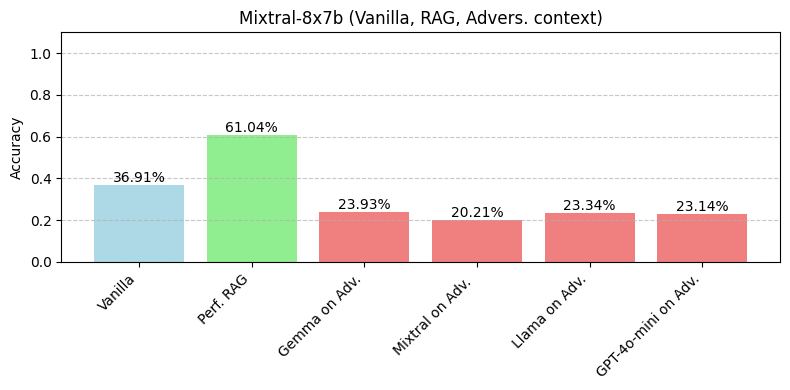

In [3]:
import matplotlib.pyplot as plt

# Assuming you've already calculated these accuracy scores
accuracies = [
    vanilla_acc,
    rag_acc,
    adversarial_gemma_acc,
    adversarial_mixtral_acc,
    adversarial_llama_acc,
    adversarial_gpt_acc,
]

labels = [
    "Vanilla",
    "Perf. RAG",
    "Gemma on Adv.",
    "Mixtral on Adv. ",
    "Llama on Adv.",
    "GPT-4o-mini on Adv.",
]
fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.bar(
    labels, accuracies, color=["lightblue", "lightgreen"] + ["lightcoral"] * 4
)
ax.set_ylim(0, 1.1)
ax.set_title("Mixtral-8x7b (Vanilla, RAG, Advers. context)")
ax.set_ylabel("Accuracy")
for i, v in enumerate(accuracies):
    ax.text(i, v, f"{v:.2%}", ha="center", va="bottom")
ax.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
# plt.savefig("accuracy_comparison.png", dpi=300)
plt.show()